# Genetic Algorithm Optimization

In [1]:
import math
import random

import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')

## Define GA

In [3]:
class GeneticAlgorithm(object):
    """Generate GA for math problem."""
    
    def __init__(self, num_generations=100):
        
        self.num_generations = num_generations
        self.fitness_score_to_plot = []
        
    def generate_population(self, num_individuals, x_genes, y_genes):
    
        lower_x_gene, upper_x_gene = x_genes
        lower_y_gene, upper_y_gene = y_genes

        population = []

        for i in range(num_individuals):

            # one individual posses chromosome with a set of x and y genes
            individual = {
                'x': random.uniform(lower_x_gene, upper_x_gene),
                'y': random.uniform(lower_y_gene, upper_y_gene),
            }

            population.append(individual)

        return population

    def evaluate_fitness(self, individual):
    
        x = individual['x']
        y = individual['y']
        
        # the problem to solve here is to find the maximum of the following function
        fitness_score = math.sin(math.sqrt(x ** 2 + y ** 2))

        return fitness_score
            
    def select_by_roulette_wheel(self, sorted_population, fitness_sum):
        
        offset = 0
        
        normalized_fitness_sum = fitness_sum
        lowest_fitness = self.evaluate_fitness(sorted_population[0])
        
        if lowest_fitness < 0:
            offset = -lowest_fitness
            normalized_fitness_sum += offset * len(sorted_population)
            
        draw = random.uniform(0, 1)
        
        accumulated = 0
        
        # the fitness of each individual relative to the population is used to assign a probability of selection
        for individual in sorted_population:
            
            fitness = self.evaluate_fitness(individual) + offset
            probability = fitness / normalized_fitness_sum
            accumulated += probability
            
            if draw <= accumulated:
                return individual
            
    def sort_population_by_fitness(self, population):
        return sorted(population, key=self.evaluate_fitness)
    
    def crossover(self, individual_a, individual_b):
        
        xa = individual_a['x']
        ya = individual_a['y']
        
        xb = individual_b['x']
        yb = individual_b['y']
        
        return { 'x': (xa + xb) / 2, 'y': (ya + yb) / 2 }
    
    def mutate(self, individual, genes):
        
        next_x = individual['x'] + random.uniform(-0.05, 0.05)
        next_y = individual['y'] + random.uniform(-0.05, 0.05)
        
        lower_gene, upper_gene = genes
        
        # guarantee we keep inside genes
        next_x = min(max(next_x, lower_gene), upper_gene)
        next_y = min(max(next_y, lower_gene), upper_gene)
        
        return { 'x': next_x, 'y': next_y }
    
    def create_next_generation(self, previous_population, genes):
        
        next_generation = []
        sorted_by_fitness_population = self.sort_population_by_fitness(previous_population)
        fitness_sum = sum(self.evaluate_fitness(individual) for individual in previous_population)
        
        population_size = len(previous_population)

        for i in range(population_size):
            
            # parents selection
            first_parent = self.select_by_roulette_wheel(sorted_by_fitness_population, fitness_sum)
            second_parent = self.select_by_roulette_wheel(sorted_by_fitness_population, fitness_sum)
            
            # mating process
            offspring = self.crossover(first_parent, second_parent)
            offspring = self.mutate(offspring, genes)
            
            # offsprings collection
            next_generation.append(offspring)
            
        return next_generation
    
    def reproduce(self, num_individuals, x_genes=(-4, 4), y_genes=(-4, 4)):
        
        # initialize the first random population
        population = self.generate_population(num_individuals, x_genes, y_genes)

        i = 1
        
        while True:

            print(f'\nGENERATION {i}')

            for num, individual in enumerate(population):
                x = individual['x']
                y = individual['y']
                fitness_score = self.evaluate_fitness(individual)
                self.fitness_score_to_plot.append(fitness_score)
                
                print(f'{num+1}/ X: {x:.6}, Y: {y:.6}, Fitness Score: {fitness_score:.6}')
                
            if i == self.num_generations:
                break

            i += 1
            
            population = self.create_next_generation(population, x_genes)
            
        best_individual = self.sort_population_by_fitness(population)[-1] # choose the best individual
        
        x = best_individual['x']
        y = best_individual['y']
        fitness_score = self.evaluate_fitness(best_individual)

        print('\nFINAL RESULT')
        print(f'X: {x:.6}, Y: {y:.6}, Fitness Score: {fitness_score:.6}')

In [4]:
GA = GeneticAlgorithm(num_generations=50)

## Train GA

In [5]:
GA.reproduce(num_individuals=10, x_genes=(-4, 4), y_genes=(-4, 4))


GENERATION 1
1/ X: 2.27312, Y: 3.11842, Fitness Score: -0.657404
2/ X: 1.87692, Y: -1.5212, Fitness Score: 0.663606
3/ X: 3.51524, Y: -1.43467, Fitness Score: -0.609275
4/ X: -3.88261, Y: -1.12503, Fitness Score: -0.783779
5/ X: 1.68834, Y: 3.79752, Fitness Score: -0.849123
6/ X: 3.77802, Y: 0.64734, Fitness Score: -0.637679
7/ X: -0.0238267, Y: 2.76699, Fitness Score: 0.365804
8/ X: -0.604862, Y: -0.0619337, Fitness Score: 0.571247
9/ X: 0.808103, Y: -1.65075, Fitness Score: 0.964529
10/ X: 1.45073, Y: 0.621797, Fitness Score: 0.999971

GENERATION 2
1/ X: -1.99869, Y: 0.845918, Fitness Score: 0.825597
2/ X: -0.313673, Y: 1.39621, Fitness Score: 0.990246
3/ X: 1.92625, Y: -1.50703, Fitness Score: 0.641053
4/ X: 0.837541, Y: -1.67406, Fitness Score: 0.955015
5/ X: 0.657292, Y: -0.814449, Fitness Score: 0.865724
6/ X: 1.62199, Y: -0.491246, Fitness Score: 0.992328
7/ X: 1.1251, Y: 2.90376, Fitness Score: 0.0274837
8/ X: 0.947827, Y: 0.630141, Fitness Score: 0.907872
9/ X: 1.86534, Y: -1

3/ X: 0.703652, Y: -1.03507, Fitness Score: 0.949488
4/ X: 0.799957, Y: -0.873953, Fitness Score: 0.92642
5/ X: 0.875524, Y: -0.942041, Fitness Score: 0.959739
6/ X: 0.827975, Y: -0.98859, Fitness Score: 0.960701
7/ X: 0.781366, Y: -0.868889, Fitness Score: 0.920183
8/ X: 0.74351, Y: -0.980003, Fitness Score: 0.942531
9/ X: 0.794744, Y: -0.970644, Fitness Score: 0.950394
10/ X: 0.770186, Y: -0.921593, Fitness Score: 0.932419

GENERATION 47
1/ X: 0.753306, Y: -0.98083, Fitness Score: 0.944716
2/ X: 0.675032, Y: -1.04787, Fitness Score: 0.947868
3/ X: 0.751769, Y: -0.983748, Fitness Score: 0.945169
4/ X: 0.832663, Y: -0.955245, Fitness Score: 0.95427
5/ X: 0.809821, Y: -0.920851, Fitness Score: 0.941241
6/ X: 0.851852, Y: -0.970386, Fitness Score: 0.961178
7/ X: 0.849662, Y: -0.920673, Fitness Score: 0.949871
8/ X: 0.752955, Y: -0.878976, Fitness Score: 0.915756
9/ X: 0.782546, Y: -0.909791, Fitness Score: 0.932054
10/ X: 0.819059, Y: -0.95167, Fitness Score: 0.950736

GENERATION 48
1/ X

## Evaluate GA

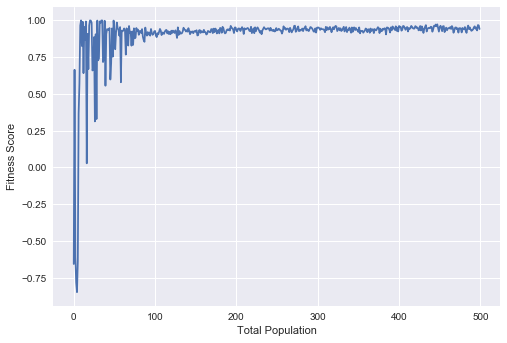

In [6]:
plt.plot(GA.fitness_score_to_plot)
plt.xlabel('Total Population')
plt.ylabel('Fitness Score')
plt.savefig('./images/plot_fitness_score.png')
plt.show()

---